# Rasterio

Information on rasterio can be found at:
[https://rasterio.readthedocs.io/en/stable/index.html](https://rasterio.readthedocs.io/en/stable/index.html)

Though part of rasterio, information on affine can be found at:
[https://affine.readthedocs.io/en/latest/](https://affine.readthedocs.io/en/latest/)



In [ ]:
# Today's star
import rasterio
import rasterio.plot
from rasterio.mask import mask

# Other actors
import numpy as np
import pandas as pd
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt

In [44]:
# Change print options to show numbers in regular format
# (i.e. non-scientific notation)
np.set_printoptions(suppress=True)

In [93]:
# Read in WorldClim data
# For the moment just get metadata
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    # Look at the metadata
    print("Number of rows (height):")
    print(src.height)
    print("-" * 50)
    print("Number of columns (width):")
    print(src.width)
    print("-" * 50)
    print("Number of bands:")
    print(src.count)
    print("-" * 50)
    print("Image CRS")
    print(src.crs)
    print("-" * 50)
    print("NoData value:")
    print(src.nodata)
    print("-" * 50)
    print("Image bounds:")
    print(src.bounds)
    print("-" * 50)
    print("Image affine matrix:")
    print(src.transform)
    print("-" * 50)
    print("Metadata dictionary:")
    print(src.meta)

Number of rows (height):
2160
--------------------------------------------------
Number of columns (width):
4320
--------------------------------------------------
Number of bands:
1
--------------------------------------------------
Image CRS
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
--------------------------------------------------
NoData value:
-3.3999999521443642e+38
--------------------------------------------------
Image bounds:
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
--------------------------------------------------
Image affine matrix:
| 0.08, 0.00,-180.00|
| 0.00,-0.08, 90.00|
| 0.00, 0.00, 1.00|
--------------------------------------------------
Metadata dictionary:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 2160, 'count

In [100]:
# Read in WorldClim data
# For the moment just get metadata
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    # Extract the metadata
    src_meta = src.meta
    # This will be very useful later
    src_extent = rasterio.plot.plotting_extent(src)

In [49]:
# Look at the metadata
print("Metadata dictionary:")
src_meta

Metadata dictionary:


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(0.08333333333333333, 0.0, -180.0,
        0.0, -0.08333333333333333, 90.0)}

In [53]:
# CRS does not look to be our conventional PyProj CRS
print(src_meta["crs"])
print(type(src_meta["crs"]))

GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
<class 'rasterio.crs.CRS'>


In [55]:
# Proofo PyProjo
# Convert to pyproj CRS
pyproj_crs = pyproj.CRS.from_user_input(src_meta["crs"])

# Look at it!
print(pyproj_crs)
print(type(pyproj_crs))

GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
<class 'pyproj.crs.crs.CRS'>


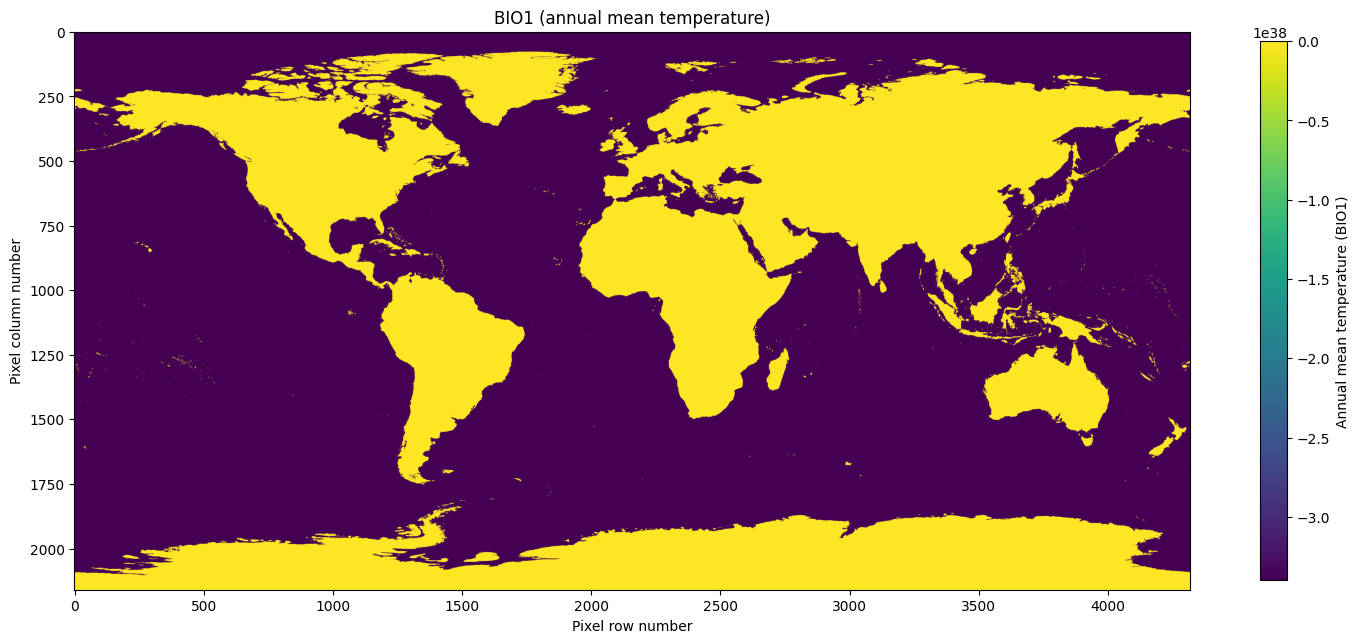

In [ ]:
# Read in WorldClim data
# This time extract band1
# Note: Rasterio uses GDAL numbering so first band is 1
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_1.tif", mode="r") as src:
    # Read in the first band
    bio1 = src.read(1)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
#img = ax.imshow(X=bio1, cmap="viridis", extent=src_extent)
# Technically you'll only get the occasional overflow error,
# but it is better to use img = ax.imshow() rather than just
# using ax.imshow()
img = ax.imshow(X=bio1, cmap="viridis")
fig.colorbar(img, ax=ax, shrink=0.7, label="Annual mean temperature (BIO1)")

# Label axes and title
ax.set_title(label="BIO1 (annual mean temperature)")
ax.set_xlabel(xlabel="Pixel row number")
ax.set_ylabel(ylabel="Pixel column number")

# Show plot (IRL/JK)
plt.show()

In [60]:
# Extract the affine matrix (src_trans)
src_trans = src_meta["transform"]

# Look at it!
print(src_trans)
print(type(src_trans))

| 0.08, 0.00,-180.00|
| 0.00,-0.08, 90.00|
| 0.00, 0.00, 1.00|
<class 'affine.Affine'>


In [63]:
# It's an Affine type matrix, but still a matrix
# (i.e. type are not so important here)
A = np.array(object=src_trans).reshape(3, 3)

print("The affine matrix (NumPy version):")
print(A)
print(type(A))

The affine matrix (NumPy version):
[[   0.08333333    0.         -180.        ]
 [   0.           -0.08333333   90.        ]
 [   0.            0.            1.        ]]
<class 'numpy.ndarray'>


In [83]:
# The affine matrix is key to allowing translation from pixel-space
# to geographic-space

# For the first pixel (0, 0)
first_pixel = np.array([[0, 0, 1]]).T

# Note: For those of you that wonder, you could also use
# Note^2: In the first case, the -1 implies "as many as
# necessary" so that it conforms
# first_pixel = np.array([[0, 0, 1]]).reshape((-1, 1))
# first_pixel = np.array([[0], [0], [1]])


# See the values of the first pixel
print("Pixel-coordinates of the first pixel (with 1 appended):")
print(first_pixel)
print(first_pixel.shape)

Pixel-coordinates of the first pixel (with 1 appended):
[[0]
 [0]
 [1]]
(3, 1)


In [76]:
# The real world coordinates of the firs pixel is simply
# the product with the affine matrix A

# See the values of the first pixel
print("\nGeographic coordinates of the first pixel (with 1 appended):")
print(A @ first_pixel)


Geographic coordinates of the first pixel (with 1 appended):
[[-180.]
 [  90.]
 [   1.]]


In [77]:
# For the last pixel (width-1, height-1)
last_pixel = np.array([[4320-1, 2160-1, 1]]).T

# See the values of the first pixel
print("Pixel-coordinates of the last pixel (with 1 appended):")
print(last_pixel)

# See the values of the first pixel
print("\nGeographic coordinates of the last pixel (with 1 appended):")
print(A @ last_pixel)

Pixel-coordinates of the last pixel (with 1 appended):
[[4319]
 [2159]
 [   1]]

Geographic coordinates of the last pixel (with 1 appended):
[[179.91666667]
 [-89.91666667]
 [  1.        ]]


In [79]:
# Numerical algebra quizzzzzzzz
print("The determinant of A:")
print(np.linalg.det(a=A))

# It is not equal to 0, so the matrix can be inverted
# Yipeeee

The determinant of A:
-0.006944444444444444


In [ ]:
# SPAT_COO = A * PIX_XY
#
# A * PIX_XY = SPAT_COO
# Am1 * A * PIX_X1 = Am1 * SPAT_COO
# I * PIX_X1 = Am1 * SPAT_COO
# PIX_X1 = Am1 * SPAT_COO

In [82]:
# Considering the inverse affine matrix means we can do the opposite translation

# Inverse affine:
# Using the affine object
print("Inverse of A (Affine version):")
print(~src_trans)
print(type(~src_trans))

# Using the NumPy matrix
Am1 = np.linalg.inv(a=A)

# Look at it!
print("\nInverse of A (NumPy version):")
print(Am1)
print(type(Am1))

Inverse of A (Affine version):
| 12.00, 0.00, 2160.00|
| 0.00,-12.00, 1080.00|
| 0.00, 0.00, 1.00|
<class 'affine.Affine'>

Inverse of A (NumPy version):
[[  12.    0. 2160.]
 [  -0.  -12. 1080.]
 [   0.    0.    1.]]
<class 'numpy.ndarray'>


In [ ]:
# Load the first five observations of desert pea.
# We can be quick about it, no need for intermediate steps.
# I take the time to remind you that .loc[] is location based.
pea5 = pd.read_csv(filepath_or_buffer="../data/desert_pea.csv").loc[0:4 ,["decimalLongitude", "decimalLatitude"]]
pea5_1 = np.hstack((pea5, np.ones(5).reshape(5, 1)))

print("\nCoordinates of first five observations with a column of 1s:")
print(pea5_1.T)


Coordinates of first five observations with a column of 1s:
[[116.787842 122.580642 136.163344 136.874328 135.993515]
 [-20.585195 -22.843242 -32.524942 -30.397483 -32.268875]
 [  1.         1.         1.         1.         1.      ]]


In [21]:
# See the values of each cells
print("\nPixel coordinates of first five observations with a column of 1s:")
print(Am1 @ pea5_1.T)

print("\nRounded pixel coordinates of first five observations with a column of 1s:")
print(np.round(Am1 @ pea5_1.T))


Pixel coordinates of first five observations with a column of 1s:
[[3.56145410e+03 3.63096770e+03 3.79396013e+03 3.80249194e+03
  3.79192218e+03]
 [1.32702234e+03 1.35411890e+03 1.47029930e+03 1.44476980e+03
  1.46722650e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]

Rounded pixel coordinates of first five observations with a column of 1s:
[[3.561e+03 3.631e+03 3.794e+03 3.802e+03 3.792e+03]
 [1.327e+03 1.354e+03 1.470e+03 1.445e+03 1.467e+03]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]]


In [22]:
# Get the pixel coordinates
pea5_pixel = np.round(Am1 @ pea5_1.T)

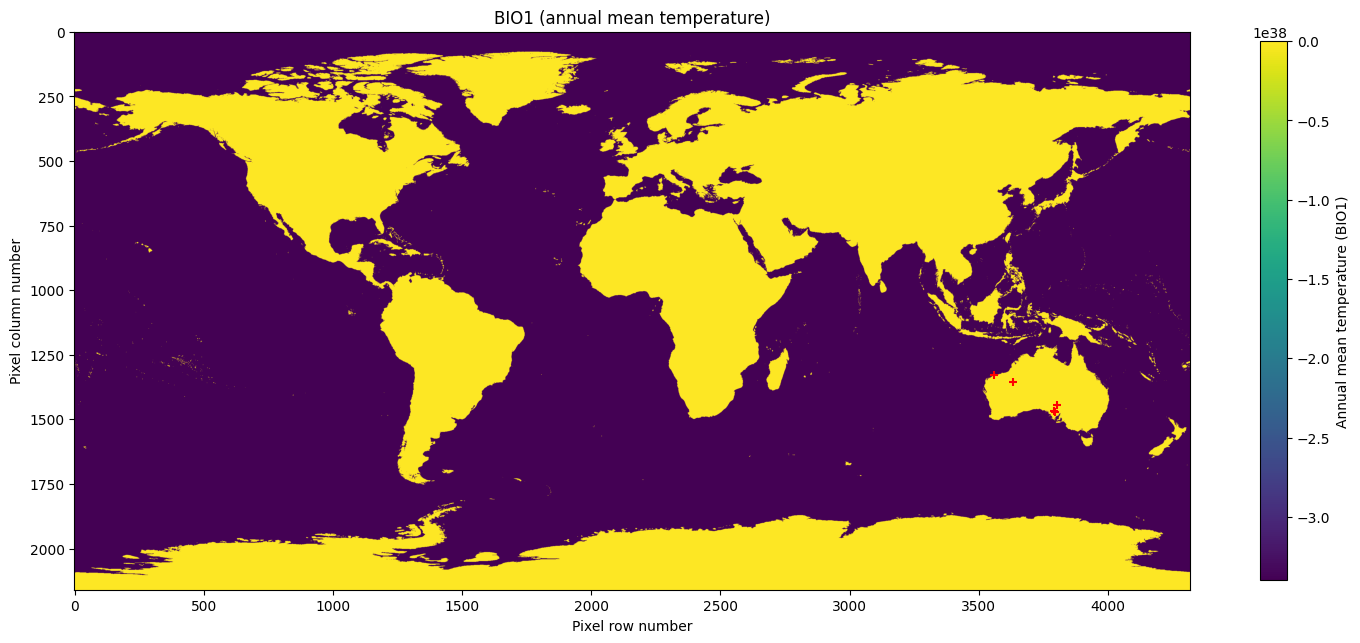

In [109]:
# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio1, cmap="viridis")

# Add the first five desert peas!!!!!
ax.scatter(x=pea5_pixel[0, :], y=pea5_pixel[1, :], marker="+", color="red", s=35)

fig.colorbar(img, ax=ax, shrink=0.7, label="Annual mean temperature (BIO1)")

# Label axes and title
ax.set_title(label="BIO1 (annual mean temperature)")
ax.set_xlabel(xlabel="Pixel row number")
ax.set_ylabel(ylabel="Pixel column number")

# Show plot
plt.show()

In [ ]:
# Finally, considering actual spatial coordinates
# See that thing we extracted before
print("The extent of the image:")
print(src_extent)
print(type(src_extent))

The extent of the image:
(-180.0, 180.0, -90.0, 90.0)
<class 'tuple'>


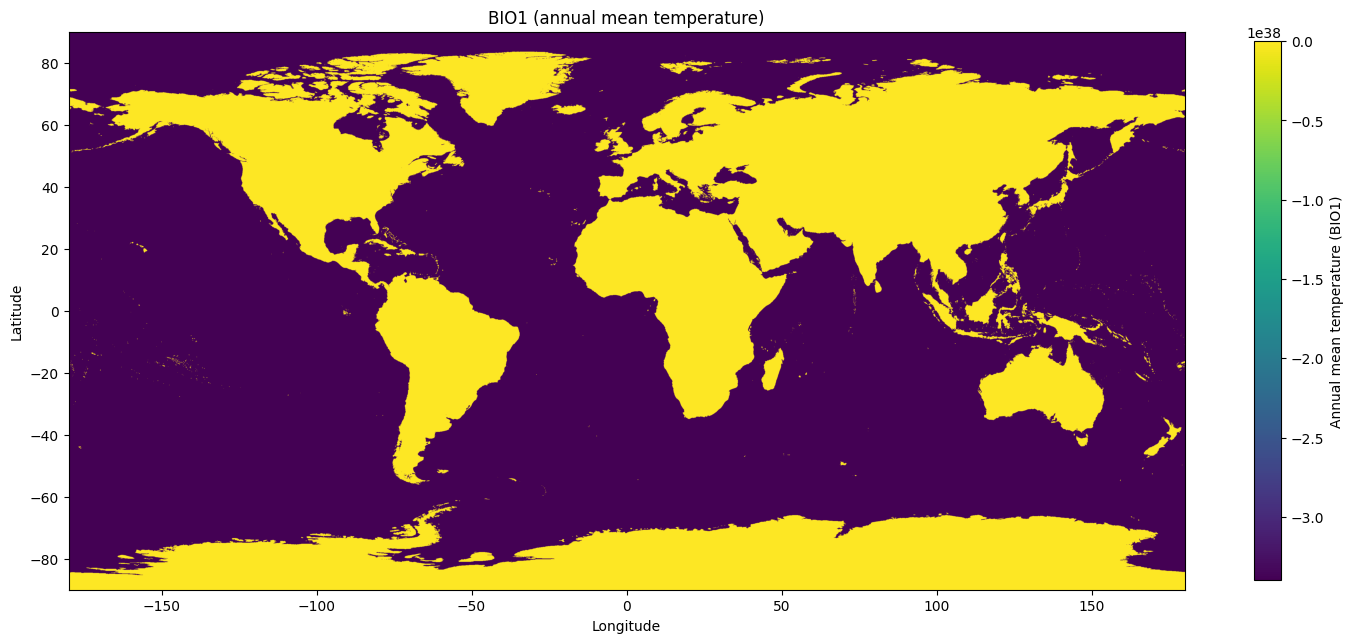

In [114]:
# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio1, cmap="viridis", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="Annual mean temperature (BIO1)")

# Label axes and title
ax.set_title(label="BIO1 (annual mean temperature)")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Show plot
plt.show()

In [37]:
# We can go fast and add all dugongs!
dugo = pd.read_csv(filepath_or_buffer="../data/sea_cow.csv").loc[: ,["decimalLongitude", "decimalLatitude"]]
dugo_1 = np.hstack((dugo, np.ones(dugo.shape[0]).reshape(dugo.shape[0], 1)))
dugo_pixel = np.round(Am1 @ dugo_1.T)

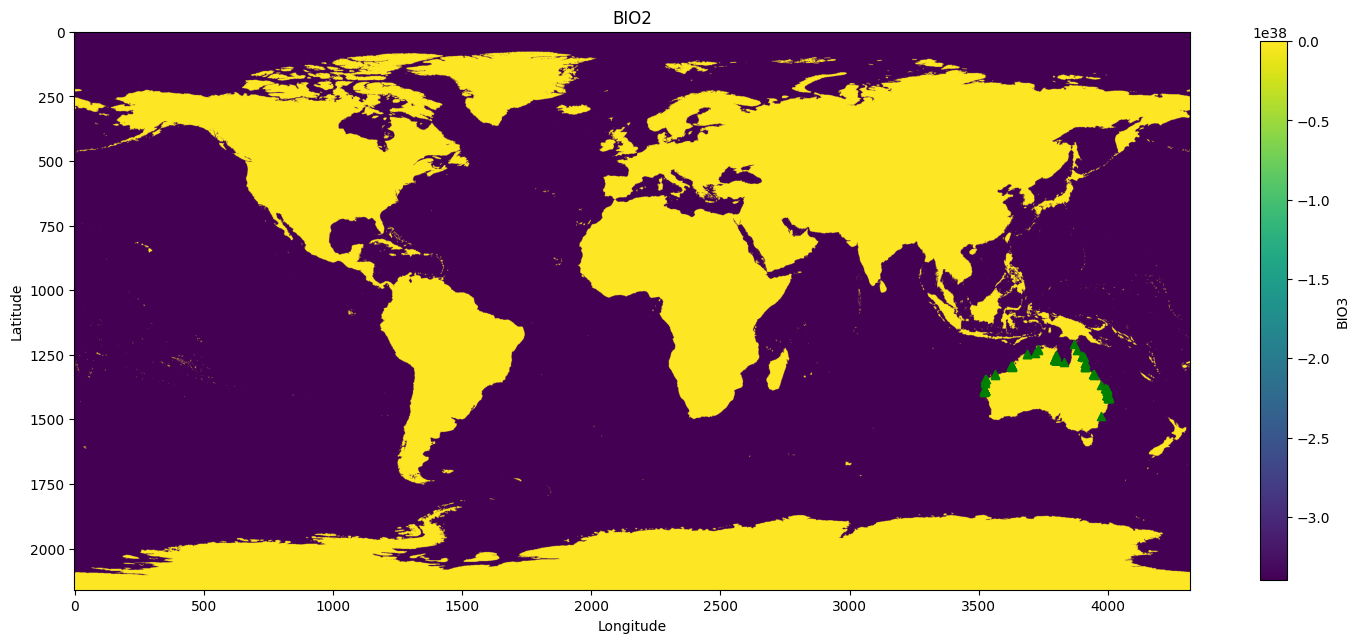

In [120]:
# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio2, cmap="viridis")
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Add the first five desert peas!!!!!
ax.scatter(x=dugo_pixel[0, :], y=dugo_pixel[1, :], marker="^", color="green", s=35)

# Label axes and title
ax.set_title(label="BIO2")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Show plot
plt.show()

In [41]:
Am1

array([[ 1.20e+01,  0.00e+00,  2.16e+03],
       [-0.00e+00, -1.20e+01,  1.08e+03],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

# Masks and whatnot

In [ ]:
# ENOUGH IS ENOUGH

# Look at the data
print(bio1)
print(type(bio1))

# 10^30 is a sedecillion.
# 10^36 is a duodecillion.
# 10^39 is a tredecillion.

[[-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 [-3.4000000e+38 -3.4000000e+38 -3.4000000e+38 ... -3.4000000e+38
  -3.4000000e+38 -3.4000000e+38]
 ...
 [-3.0406666e+01 -3.1616875e+01 -3.1617043e+01 ... -3.2788250e+01
  -3.2789665e+01 -3.0401751e+01]
 [-3.4747417e+01 -3.6126293e+01 -3.6126915e+01 ... -3.7479458e+01
  -3.7478584e+01 -3.4753918e+01]
 [-2.6079584e+01 -2.7115126e+01 -2.7115499e+01 ... -2.8144917e+01
  -2.8145958e+01 -2.6102875e+01]]
<class 'numpy.ndarray'>


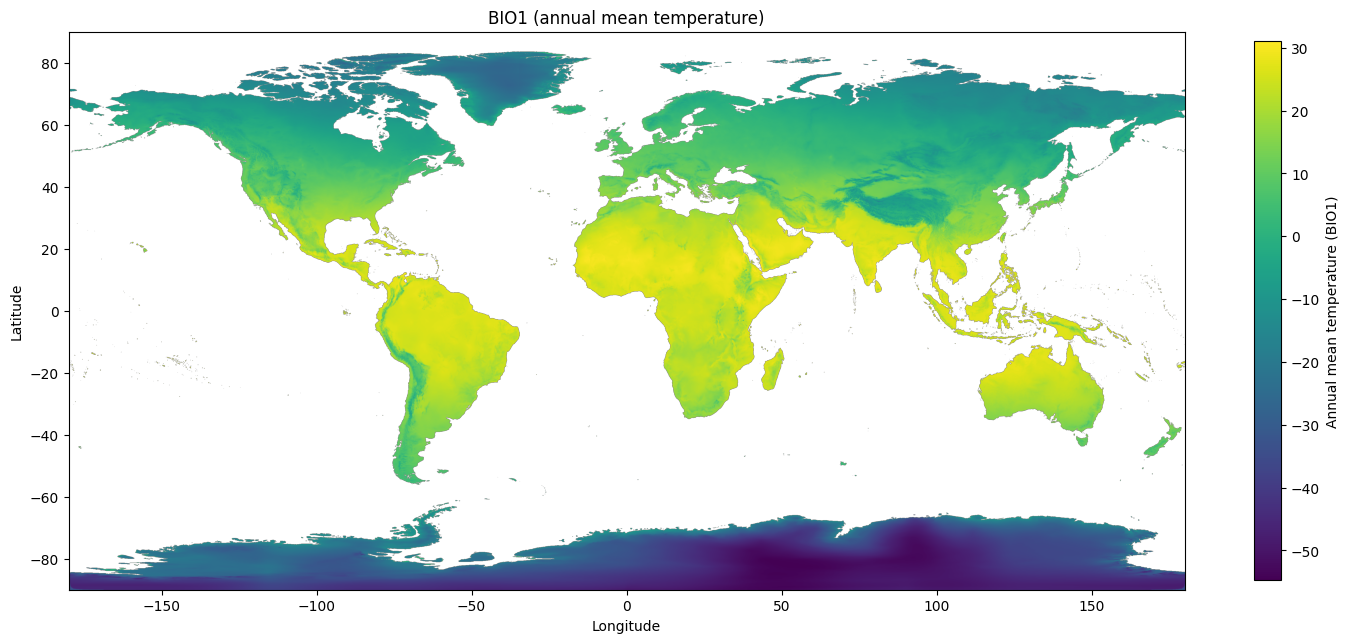

In [144]:
# Read in WorldClim data
# This time extract band1
# Note: Rasterio uses GDAL numbering so first band is 1
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_1.tif", mode="r") as src:
    # Read in the first band
    # Overwrite the previous value
    # We're living dangerously
    bio1 = src.read(1, masked=True)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio1, cmap="viridis", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="Annual mean temperature (BIO1)")

# Label axes and title
ax.set_title(label="BIO1 (annual mean temperature)")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Show plot
plt.show()

In [127]:
# Look at the newly changed data
print(bio1)
print(type(bio1))

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-30.406665802001953 -31.61687469482422 -31.617042541503906 ...
  -32.78824996948242 -32.78966522216797 -30.401750564575195]
 [-34.74741744995117 -36.12629318237305 -36.126914978027344 ...
  -37.47945785522461 -37.47858428955078 -34.7539176940918]
 [-26.0795841217041 -27.11512565612793 -27.11549949645996 ...
  -28.144916534423828 -28.145957946777344 -26.102874755859375]]
<class 'numpy.ma.MaskedArray'>


In [145]:
# BTW JFK
# If you want to see the available colormaps in matplotlib
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

# Rasters a numpy arrays

This means we can do more than just plotting.

In [ ]:
# Using the same method, fetch data for:
# - BIO2 (mean diurnal range)
# - BIO5 (maximum temperature of the warmest month)
# - BIO6 (minimum temperature of the coldest month)

# Different calls because they are on different .zip files.
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_2.tif", mode="r") as src:
    bio2 = src.read(1, masked=True)

with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_5.tif", mode="r") as src:
    bio5 = src.read(1, masked=True)

with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_6.tif", mode="r") as src:
    bio6 = src.read(1, masked=True)

In [133]:
# Compute BIO3 (isothemality) "by hand" (if your hand was a computer)
#
bio3 = bio2 / (bio5 - bio6) * 100

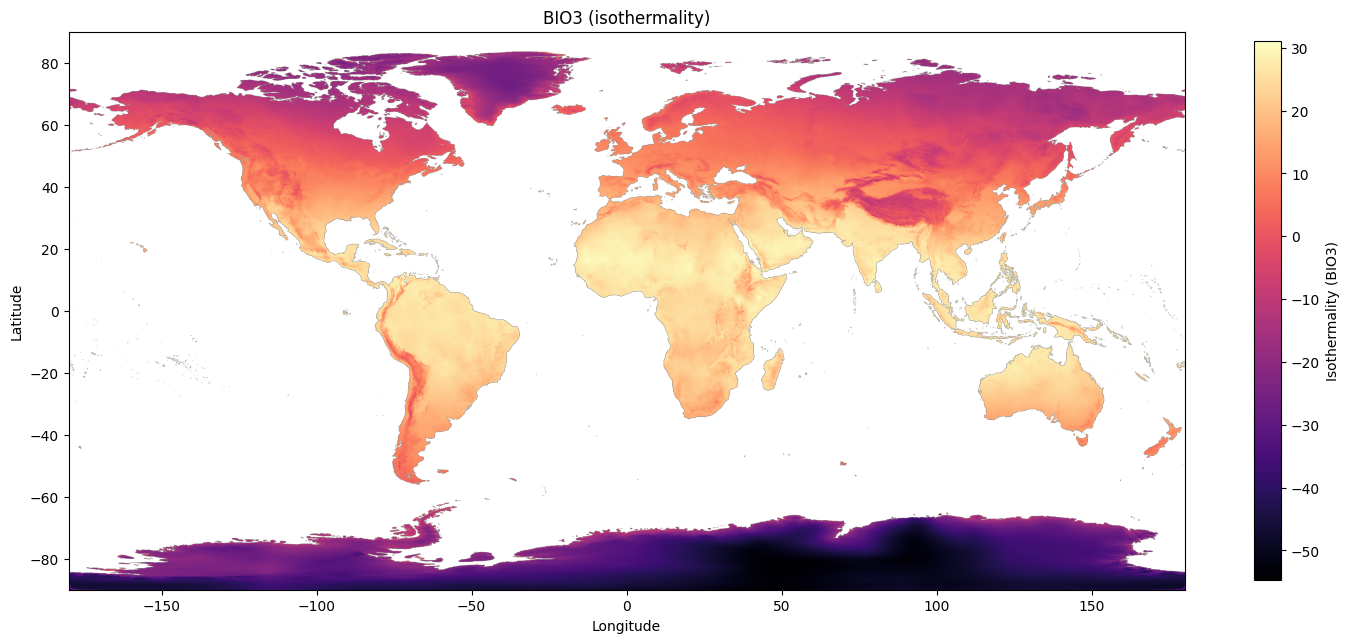

In [147]:
# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
# BTW they all have the same extent so we can use the same one
img = ax.imshow(X=bio1, cmap="magma", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="Isothermality (BIO3)")

# Label axes and title
ax.set_title(label="BIO3 (isothermality)")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Show plot
plt.show()

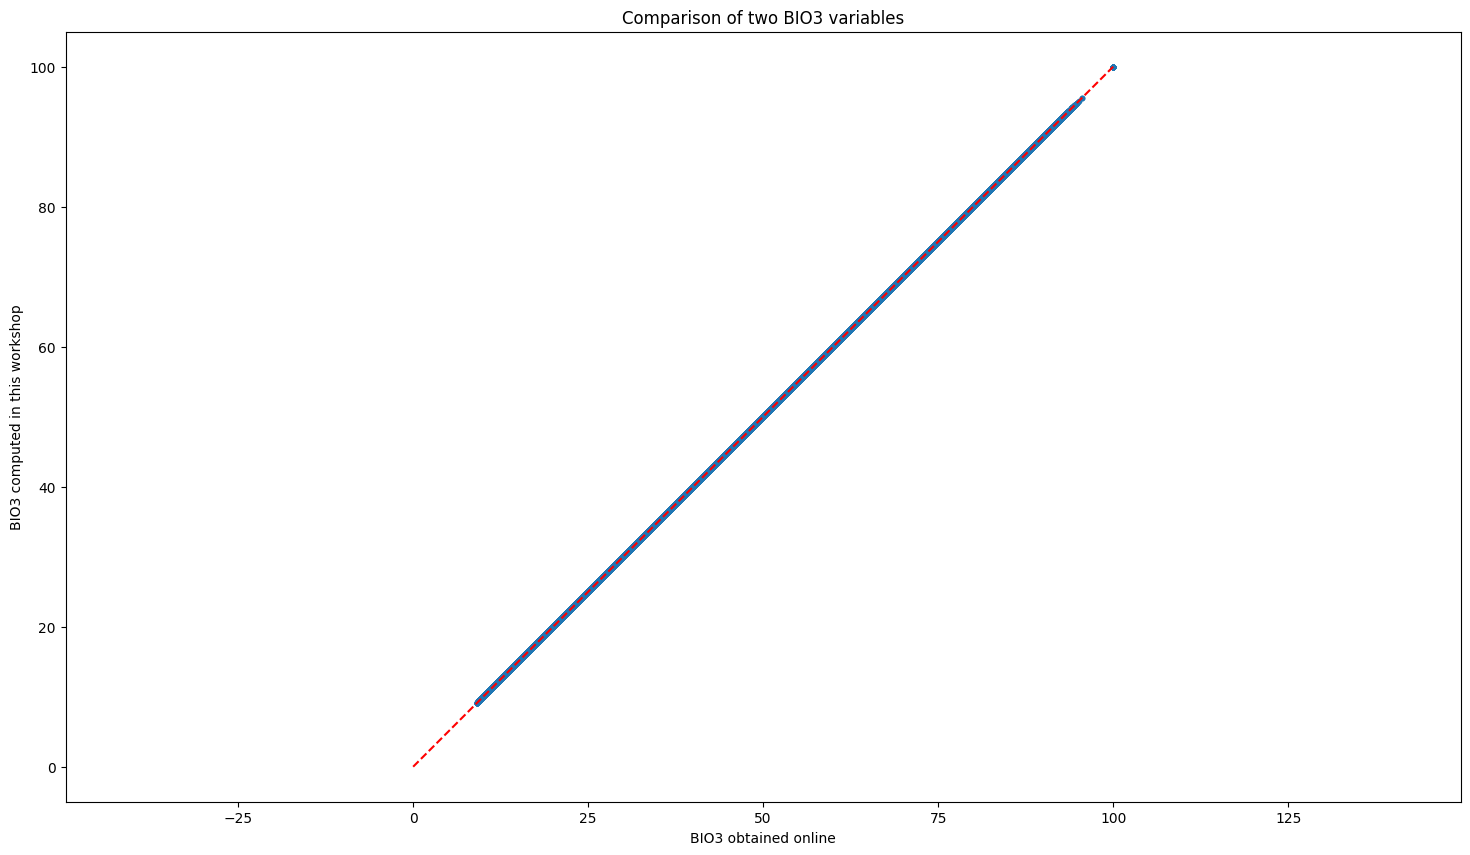

In [135]:
# Just for kicks, read the actual BIO3
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_3.tif", mode="r") as src:
    bio3_web = src.read(1, masked=True)

# Create a scatter plot comparing the two
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

ax.set_aspect(aspect="equal", adjustable="datalim")

ax.scatter(bio3_web.flatten(), bio3.flatten(), s=10)
# Add the 1:1 line (y = x)
ax.plot([0, 100], [0, 100], color="red", linestyle="dashed", label="1:1 line")

# Labeling the axes and title
ax.set_title(label="Comparison of two BIO3 variables")
ax.set_xlabel(xlabel="BIO3 obtained online")
ax.set_ylabel(ylabel="BIO3 computed in this workshop")

# Show the plot
plt.show()

# CROPPING

In [148]:
# Go fetch the Australian territories data once more.
# Convert it to EPSG4326, the same CRS as the WORLDCLIM data.
gdf_aus = gpd.read_file(filename="https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/STE_2021_AUST_SHP_GDA2020.zip")
gdf_aus.to_crs(crs=4326, inplace=True)

In [174]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_11.tif") as src:
    # Read the first band
    bio11 = src.read(1, masked=True)
 
    # DISREGARD THE LAST "GEOMETRY"
    # WHY YOU EXIST FOR ONLY A LINK?!?!?!
    out_image, out_transform = mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)

# IF JUST ONE IT NEEDS TO BE A LIST
#    out_image, out_transform = mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=False, filled=True)
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:4].to_list(), crop=True, filled=True)

    # Step 4: Update metadata to reflect the new cropped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "count": 1,
        "dtype": "float32",
        "crs": src.crs,
        "transform": out_transform,
        "width": out_image.shape[2],
        "height": out_image.shape[1]
    })


In [175]:
# Save the cropped raster to a new file
# Pass the metadata as kwargs
with rasterio.open(fp="../data/austo.tif", mode="w", **out_meta) as dest:
    dest.write(out_image)

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


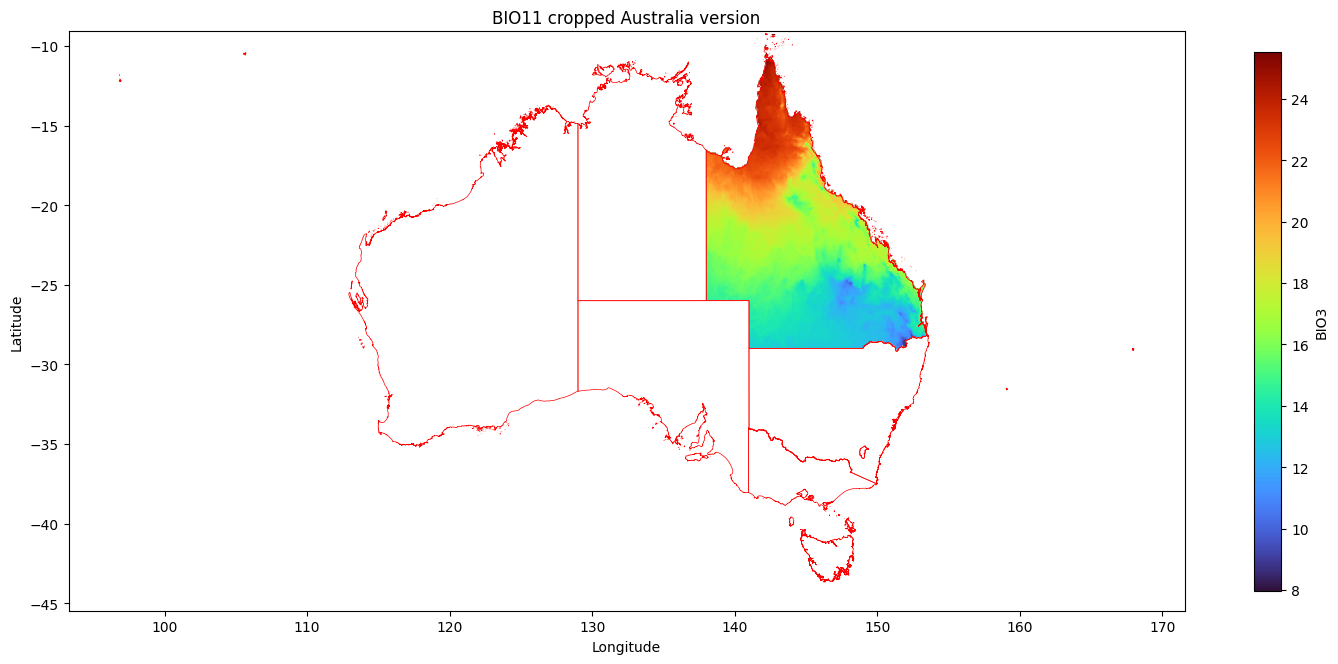

In [176]:
# Open the raster file we created in the above cell
with rasterio.open(fp="../data/austo.tif", mode="r") as src:
    bio11_crop = src.read(1, masked=True)

    # Here SUPER important!
    # You cropped the image, so the extent has changed
    src_extent_crop = rasterio.plot.plotting_extent(src)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio11_crop, cmap="turbo", extent=src_extent_crop)
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Label axes and title
ax.set_title(label="BIO11 cropped Australia version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Overlay boundary
gdf_aus.boundary.plot(ax=ax, color="red", linewidth=0.5)

plt.show()

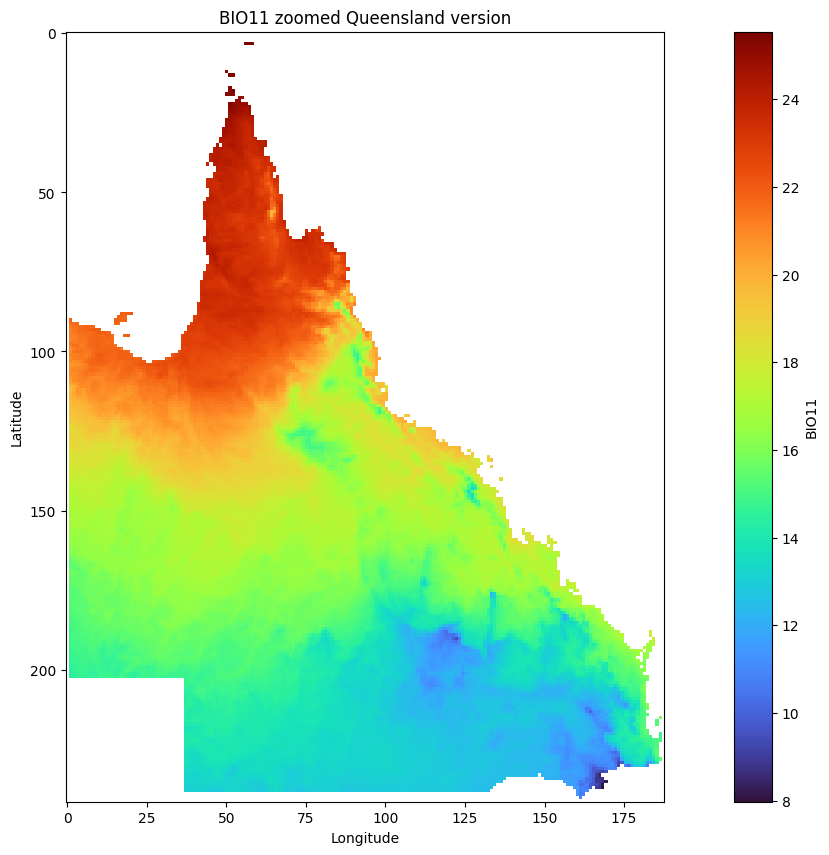

In [182]:
# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=bio11_crop, cmap="turbo")
fig.colorbar(img, ax=ax, shrink=1.0, label="BIO11")

# Label axes and title
ax.set_title(label="BIO11 zoomed Queensland version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

plt.show()

In [152]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open(fp="/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_11.tif") as src:
    # Read the first band
    band1 = src.read(1, masked=True)
 
    # DISREGARD THE LAST "GEOMETRY"
    # WHY YOU EXIST FOR ONLY A LINK?!?!?!
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=True, filled=True)

# IF JUST ONE IT NEEDS TO BE A LIST
#    out_image, out_transform = mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=False, filled=True)
    out_image, out_transform = mask(src, gdf_aus.geometry[0:4].to_list(), crop=True, filled=True)


#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
    
    # Get the nodata value
#    nodata_val = src.nodata

    # Step 4: Update metadata to reflect the new cropped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "count": 1,
        "dtype": 'float32',
        "crs": src.crs,
 #       "nodata": nodata_val,
        "transform": out_transform,
        "width": out_image.shape[2],
        "height": out_image.shape[1]
    })


In [153]:
# Save the cropped raster to a new file
with rasterio.open(fp="../data/austo.tif", mode="w", **out_meta) as dest:
    dest.write(out_image)

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


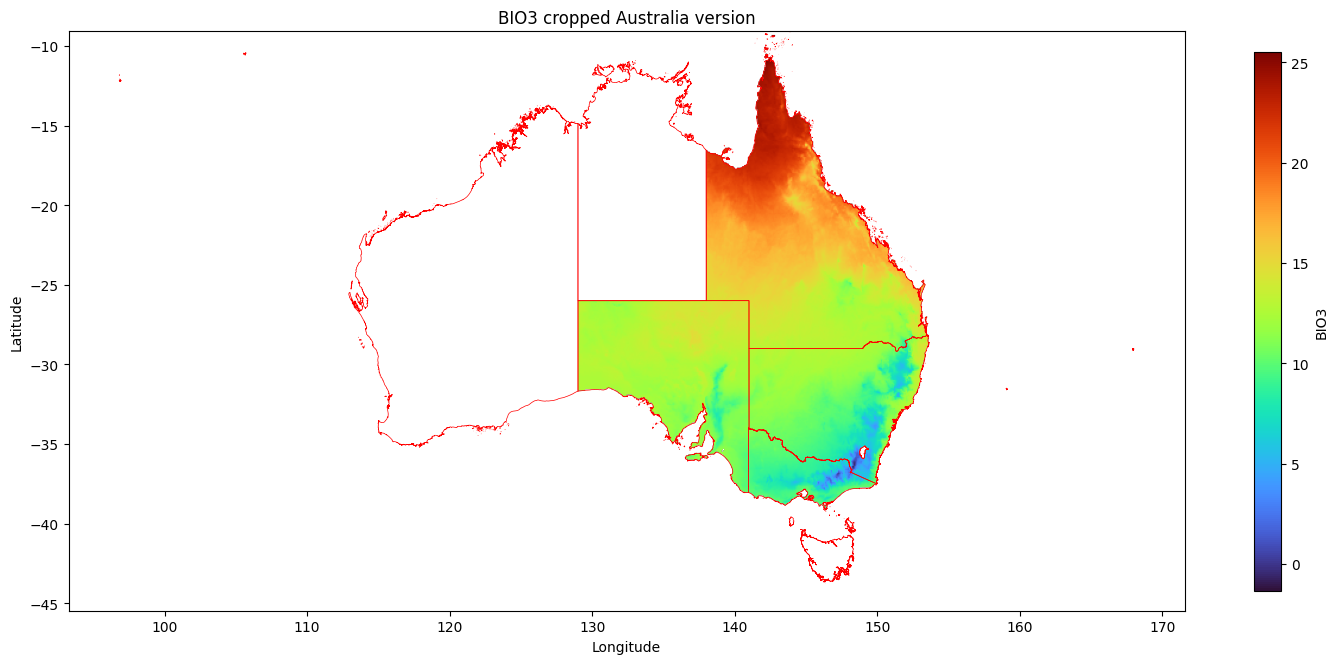

In [159]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd

# Load your boundary shapefile (assuming this is done somewhere)
# gdf_aus = gpd.read_file("path/to/australia_boundary.shp")

# Open the raster file
with rasterio.open(fp="../data/austo.tif", mode="r") as src:
    band1 = src.read(1, masked=True)
    src_extent = rasterio.plot.plotting_extent(src)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=band1, cmap="turbo", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Label axes and title
ax.set_title(label="BIO3 cropped Australia version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Overlay boundary
gdf_aus.boundary.plot(ax=ax, color="red", linewidth=0.5)

plt.show()

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


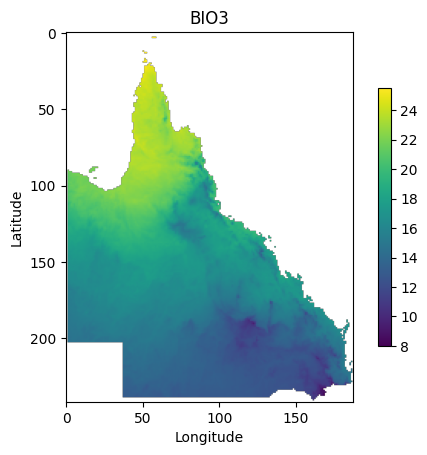

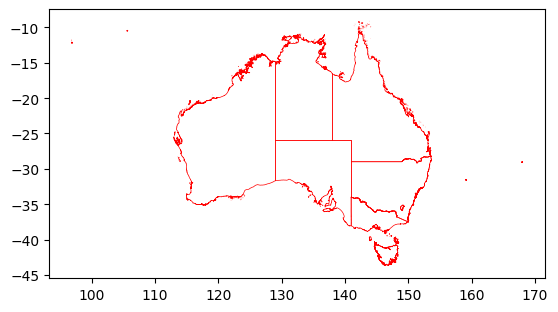

In [151]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Open the raster file
with rasterio.open("../data/austo.tif") as src:
    band1 = src.read(1, masked=True)
    
    # Use rasterio's show() function to display the image
#    plt.plot(X=band1, ax=ax, cmap="turbo")

plt.imshow(X=band1, cmap="viridis")
plt.title(label="BIO3")
plt.colorbar(shrink=0.7)
plt.xlabel(xlabel="Longitude")
plt.ylabel(ylabel="Latitude")

# Add additional layers like boundaries, if necessary
gdf_aus.boundary.plot(color="red", linewidth=0.5)


plt.show()

# Display the plot
#plt.show()

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


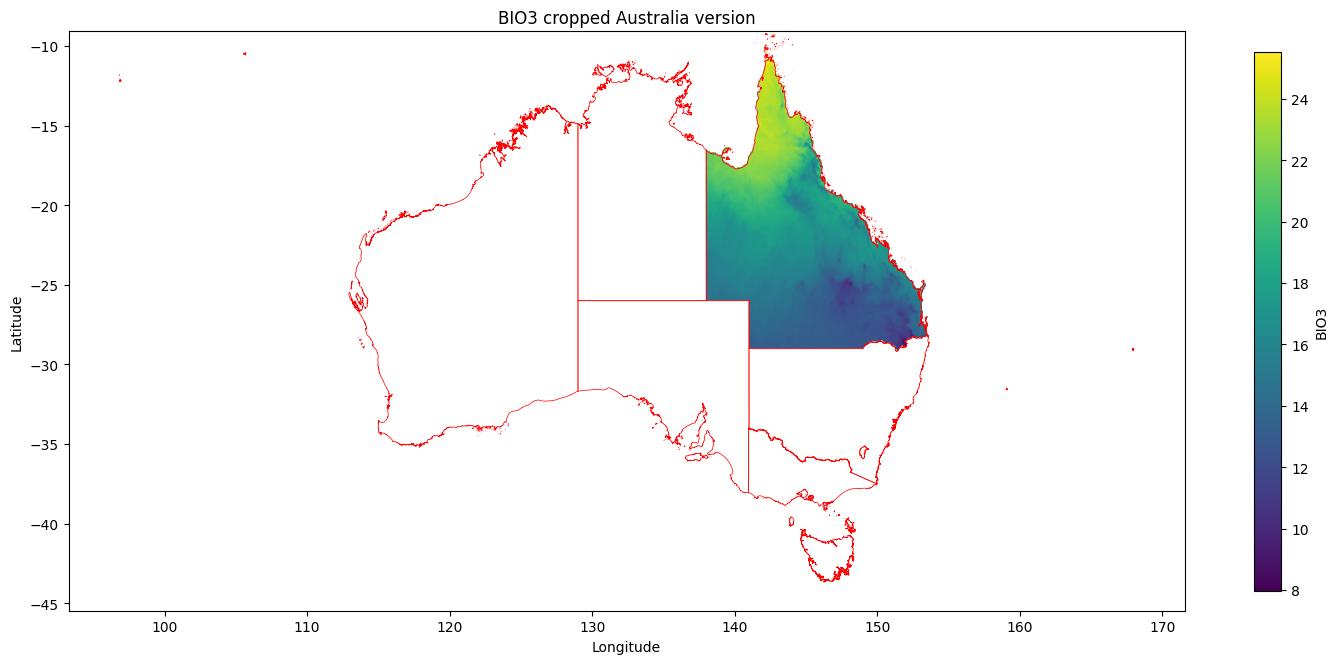

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd

# Load your boundary shapefile (assuming this is done somewhere)
# gdf_aus = gpd.read_file("path/to/australia_boundary.shp")

# Open the raster file
with rasterio.open(fp="../data/austo.tif", mode="r") as src:
    band1 = src.read(1, masked=True)
    src_extent = rasterio.plot.plotting_extent(src)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=band1, cmap="viridis", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Label axes and title
ax.set_title(label="BIO3 cropped Australia version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

# Overlay boundary
gdf_aus.boundary.plot(ax=ax, color="red", linewidth=0.5)

plt.show()

# COMBINO MAXIMO

In [21]:
gdf_aus
pstr = gpd.read_file(filename="../data/pstr_area.geojson")
ampho = gpd.read_file(filename="https://diffusion.mffp.gouv.qc.ca/Diffusion/DonneeGratuite/Faune/Aires_repartition/Amphibien/SQLite/Aires_repartition_amphibiens.sqlite")

In [26]:
# Open the raster (WorldClim data) with rasterio
with rasterio.open("/vsizip/vsicurl/https://geodata.ucdavis.edu/climate/worldclim/2_1/base/wc2.1_5m_bio.zip/wc2.1_5m_bio_11.tif") as src:
    # Read the first band
    band1 = src.read(1, masked=True)
 
    # DISREGARD THE LAST "GEOMETRY"
    # WHY YOU EXIST FOR ONLY A LINK?!?!?!
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9], crop=True, filled=True)

# IF JUST ONE IT NEEDS TO BE A LIST
#    out_image, out_transform = mask(src, gdf_aus.geometry[0:9].tolist() + pstr.geometry.tolist(), crop=False, filled=True)
    out_image, out_transform = mask(src, gdf_aus.geometry[0:9].tolist() + ampho.to_crs("EPSG:4326").geometry[0:1].tolist(), crop=False, filled=True)

#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
#    out_image, out_transform = rasterio.mask.mask(src, [gdf_aus.geometry[2]], crop=True, filled=True)
    
    # Get the nodata value
#    nodata_val = src.nodata

    # Step 4: Update metadata to reflect the new cropped raster
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "count": 1,
        "dtype": 'float32',
        "crs": src.crs,
 #       "nodata": nodata_val,
        "transform": out_transform,
        "width": out_image.shape[2],
        "height": out_image.shape[1]
    })


In [27]:
# Save the cropped raster to a new file
with rasterio.open(fp="../data/combino.tif", mode="w", **out_meta) as dest:
    dest.write(out_image)

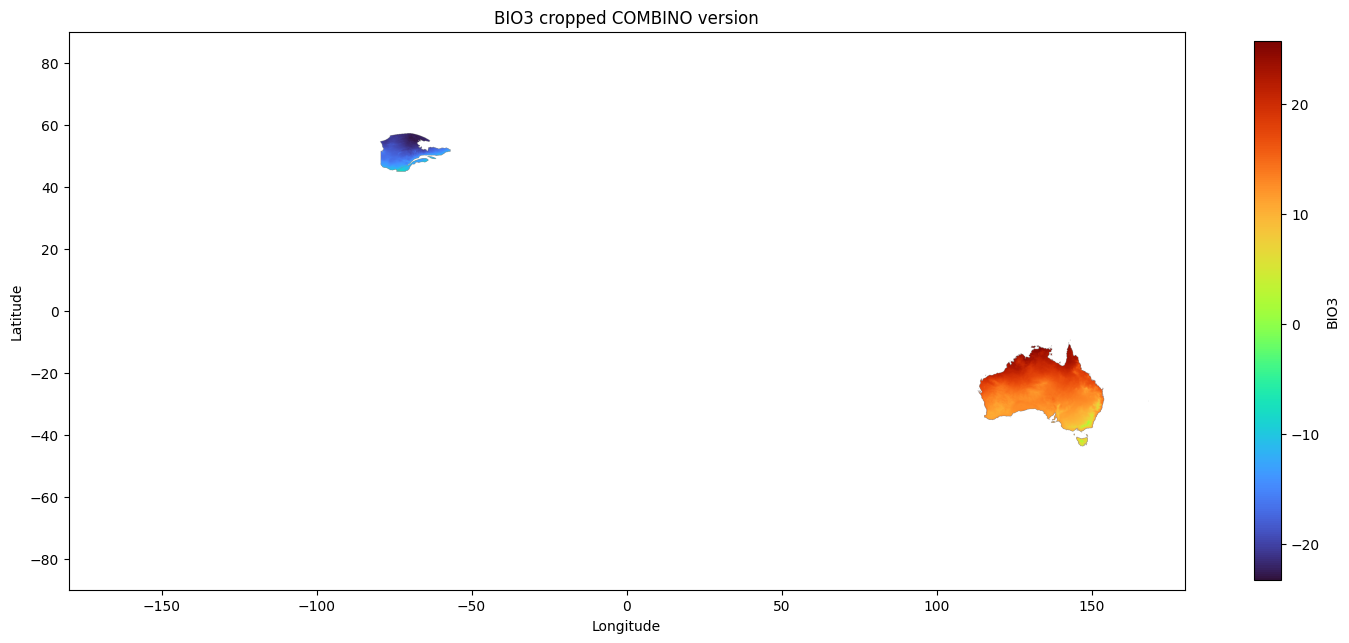

In [187]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd

# Load your boundary shapefile (assuming this is done somewhere)
# gdf_aus = gpd.read_file("path/to/australia_boundary.shp")

# Open the raster file
with rasterio.open(fp="../data/combino.tif", mode="r") as src:
    band1 = src.read(1, masked=True)
    src_extent = rasterio.plot.plotting_extent(src)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=band1, cmap="turbo", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Label axes and title
ax.set_title(label="BIO3 cropped COMBINO version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

plt.show()

In [ ]:
[gdf_aus.geometry[0:9], pstr.geometry]

[0    MULTIPOLYGON (((159.0623 -31.50886, 159.06218 ...
 1    MULTIPOLYGON (((146.29286 -39.15778, 146.29341...
 2    MULTIPOLYGON (((142.5314 -10.68301, 142.53072 ...
 3    MULTIPOLYGON (((140.66025 -38.06256, 140.66006...
 4    MULTIPOLYGON (((117.86953 -35.19108, 117.86961...
 5    MULTIPOLYGON (((144.60439 -41.01001, 144.60443...
 6    MULTIPOLYGON (((133.02818 -10.90839, 133.02982...
 7    POLYGON ((149.06239 -35.1591, 149.09134 -35.14...
 8    MULTIPOLYGON (((167.94747 -29.12757, 167.94748...
 Name: geometry, dtype: geometry,
 0    MULTIPOLYGON (((-73.88081 45.31707, -73.87916 ...
 Name: geometry, dtype: geometry]

In [17]:
gdf_aus.geometry[0:9].tolist() + pstr.geometry.tolist()

[<MULTIPOLYGON (((159.062 -31.509, 159.062 -31.509, 159.062 -31.509, 159.062 ...>,
 <MULTIPOLYGON (((146.293 -39.158, 146.293 -39.157, 146.293 -39.157, 146.293 ...>,
 <MULTIPOLYGON (((142.531 -10.683, 142.531 -10.682, 142.531 -10.682, 142.532 ...>,
 <MULTIPOLYGON (((140.66 -38.063, 140.66 -38.062, 140.66 -38.062, 140.66 -38....>,
 <MULTIPOLYGON (((117.87 -35.191, 117.87 -35.191, 117.87 -35.191, 117.87 -35....>,
 <MULTIPOLYGON (((144.604 -41.01, 144.604 -41.01, 144.604 -41.01, 144.604 -41...>,
 <MULTIPOLYGON (((133.028 -10.908, 133.03 -10.907, 133.032 -10.906, 133.037 -...>,
 <POLYGON ((149.062 -35.159, 149.091 -35.142, 149.092 -35.141, 149.092 -35.14...>,
 <MULTIPOLYGON (((167.947 -29.128, 167.947 -29.128, 167.947 -29.127, 167.947 ...>,
 <MULTIPOLYGON (((-73.881 45.317, -73.879 45.316, -73.879 45.316, -73.879 45....>]

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


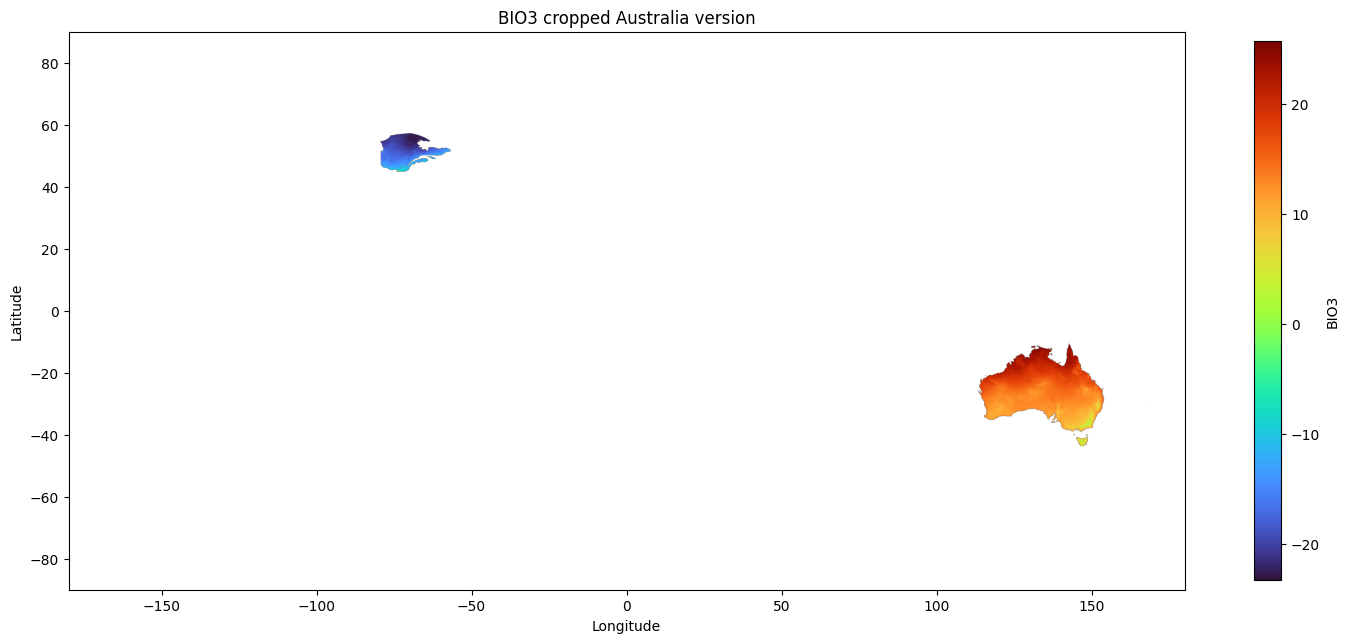

In [159]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd

# Load your boundary shapefile (assuming this is done somewhere)
# gdf_aus = gpd.read_file("path/to/australia_boundary.shp")

# Open the raster file
with rasterio.open("../data/combino.tif") as src:
    band1 = src.read(1, masked=True)
    src_extent = rasterio.plot.plotting_extent(src)

# Set up the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))

# Display the raster using imshow
img = ax.imshow(X=band1, cmap="turbo", extent=src_extent)
fig.colorbar(img, ax=ax, shrink=0.7, label="BIO3")

# Label axes and title
ax.set_title(label="BIO3 cropped Australia version")
ax.set_xlabel(xlabel="Longitude")
ax.set_ylabel(ylabel="Latitude")

plt.show()